# How to use Data Scaling improve DL model stability and performance
Deep learning neural networks learn how to map inputs to outputs from examples in a training dataset.

The weights of the model are initialized to small random values and updated via an optimization algorithm in response to estimates of error on the training dataset.

Given the use of small weights in the model and the use of error between predictions and expected values, the scale of inputs and outputs used to train the model are an important factor. Unscaled input variables can result in a slow or unstable learning process, whereas unscaled target variables on regression problems can result in exploding gradients causing the learning process to fail.

Data preparation involves using techniques such as the normalization and standardization to rescale input and output variables prior to training a neural network model.

# 1. the scale of data metters
Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales.

Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.

# 1.1. Scaling input variables
A good rule of thumb is that input variables should be small values, probably in the range of 0-1 or standardized with a zero mean and a standard deviation of one.

Whether input variables require scaling depends on the specifics of your problem and of each variable.

# 1.2. Scaling output variables
If your output activation function has a range of [0,1], then obviously you must ensure that the target values lie within that range. But it is generally better to choose an output activation function suited to the distribution of the targets than to force your data to conform to the output activation function.

# 1.3. Data scaling methods

## 1.3.1. Data normalization
    norm(x) = (x - min) / (max - min)
    
- norm(x): normalization of value x
- min: the minimal value in the observated values
- max: the maximal value

Using sklearn.preprocessing MinMaxScaler() method to normalize data
    
    scaler = MinMaxScaler()
    scaler.fit(data)
    normalized = scaler.transform(data)
    -->inverse transform
    inversed = scaler.inverse_transform(normalized)
    
## 1.3.2. Data standardization
Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

    standard(x) = (x - mean) / std
    
- standard(x): standardization of x value
- mean: the mean of observated values 
- std: standard deviation

Using StandardScaler() from sklearn.preprocessing

    scaler = StandardScaler()
    standardized = fit_transform(data)
    -->inverse transform
    inversed = scaler.inverse_transform(standardized)

## 1.3.3. Regression predictive modeling problem
A regression predictive modeling problem involves predicting a real-valued quantity.

We will use this function to define a problem that has 20 input features; 10 of the features will be meaningful and 10 will not be relevant. A total of 1,000 examples will be randomly generated. The pseudorandom number generator will be fixed to ensure that we get the same 1,000 examples each time the code is run.

(1000, 20) (1000,)


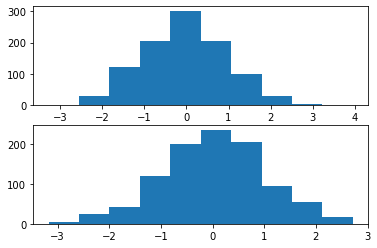

target variables


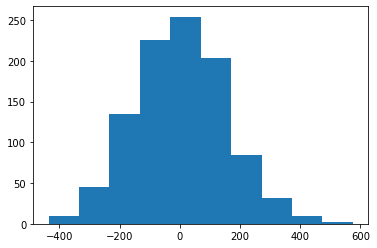

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# generate regression data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
print(X.shape, y.shape)
# input values
plt.subplot(211)
plt.hist(X[:, 0])
plt.subplot(212)
plt.hist(X[:, 1])
plt.show()
# target variables
print('target variables')
plt.hist(y)
#plt.title('y variables')
plt.show()
#print(X[0])

# Multilayer Perceptron with Unscaled data

In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

2022-02-18 16:29:13.597699: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-02-18 16:29:13.597719: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: G15
2022-02-18 16:29:13.597723: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: G15
2022-02-18 16:29:13.597798: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.47.3
2022-02-18 16:29:13.597809: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.47.3
2022-02-18 16:29:13.597812: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.47.3
2022-02-18 16:29:13.598221: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations: 

train: nan, test: nan


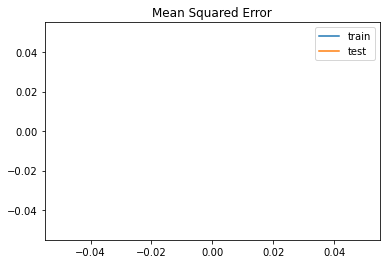

In [3]:
# split train, test datasets
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
def fit_model(trainX, trainy, testX, testy):
    model = Sequential()
    # a single hidden later uses 25 nodes, rectified linear activation function
    model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform')) #input layer
    model.add(Dense(1, activation='linear')) # output layer
    # compile model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
    # fit
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # evaluate model
    train_mse = model.evaluate(trainX, trainy, verbose=0)
    test_mse = model.evaluate(testX, testy, verbose=0)
    print('train: %.3f, test: %.3f' % (train_mse, test_mse))
    # plot
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Mean Squared Error')
    plt.legend()
    plt.show()
    
# run unscaled data
fit_model(trainX, trainy, testX, testy)

- ensure that the scale of your output variable matches the scale of the activation function (transfer function) on the output layer of your network.

### Binary Classification Problem
- If your problem is a binary classification problem, then the output will be class values 0 and 1. This is best modeled with a sigmoid activation function on the output layer. Output values will be real values between 0 and 1 that can be snapped to crisp values.

### Multi-class classification Problem
- If your problem is a multi-class classification problem, then the output will be a vector of binary class values between 0 and 1, one output per class value. This is best modeled with a softmax activation function on the output layer. Again, output values will be real values between 0 and 1 that can be snapped to crisp values.

### Regression Problem
- If your problem is a regression problem, then the output will be a real value. This is best modeled with a linear activation function. If the distribution of the value is normal, then you can standardize the output variable. Otherwise, the output variable can be normalized.

### Other Problem
- There are many other activation functions that may be used on the output layer and the specifics of your problem may add confusion.

The rule of thumb is to ensure that the network outputs match the scale of your data.

# Multilayer Perceptron with Scaled Output variables

(500, 1) (500, 1)
train: 0.001, test: 0.002


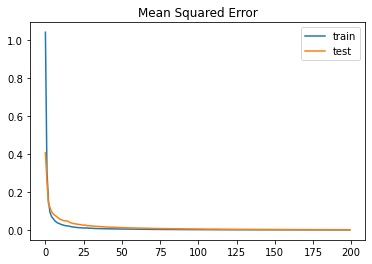

In [4]:
from sklearn.preprocessing import StandardScaler

# reshape 1d arras to 2d arrays of y
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)
print( trainy.shape, testy.shape)
# create scaler
scaler = StandardScaler()
# fit scaler
scaler.fit(trainy)
# transform
trainy = scaler.transform(trainy)
testy = scaler.transform(testy)

# done the scaling output variables
fit_model(trainX, trainy, testX, testy)

- A line plot of the mean squared error on the train (blue) and test (orange) dataset over each training epoch is created.

- In this case, we can see that the model rapidly learns to effectively map inputs to outputs for the regression problem and achieves good performance on both datasets over the course of the run, neither overfitting or underfitting the training dataset.

# Multilayer Perceptron with Scaled Input variables

train: 0.000, test: 0.000


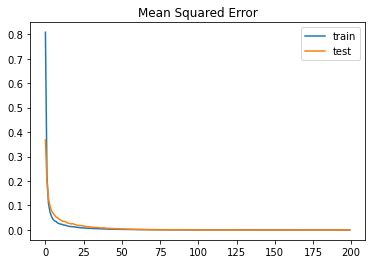

In [5]:
# scaler fits the input train and test dataset
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)
# model fitting with both scaled input and output variables
fit_model(trainX, trainy, testX, testy)

- Both train and test MSE (loss) is nearly zero.

## Practical Considerations When Scaling
There are some practical considerations when scaling sequence data.

- Estimate Coefficients. You can estimate coefficients (min and max values for normalization or mean and standard deviation for standardization) from the training data. Inspect these first-cut estimates and use domain knowledge or domain experts to help improve these estimates so that they will be usefully correct on all data in the future.
- Save Coefficients. You will need to normalize new data in the future in exactly the same way as the data used to train your model. Save the coefficients used to file and load them later when you need to scale new data when making predictions.
- Data Analysis. Use data analysis to help you better understand your data. For example, a simple histogram can help you quickly get a feeling for the distribution of quantities to see if standardization would make sense.
- Scale Each Series. If your problem has multiple series, treat each as a separate variable and in turn scale them separately.
- Scale At The Right Time. It is important to apply any scaling transforms at the right time. For example, if you have a series of quantities that is non-stationary, it may be appropriate to scale after first making your data stationary. It would not be appropriate to scale the series after it has been transformed into a supervised learning problem as each column would be handled differently, which would be incorrect.
- Scale if in Doubt. You probably do need to rescale your input and output variables. If in doubt, at least normalize your data.